In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_marketcap = pd.read_csv("../Data/Raw/dataset/Dfmcap.csv",parse_dates = ['DateTime'])

In [7]:
df_domper100 = pd.read_csv("../Data/Raw/dataset/df_domper100.csv",parse_dates = ['DateTime'])

In [8]:
df_agrupado = df_marketcap.resample('D', on='DateTime').mean()

In [9]:
df_agrupado

,Market cap,Volume (24h),Market cap BTC,Market cap ETH,Market cap USDT,Market cap BNB,Market cap XRP,Market cap USDC,Market cap SOL,Market cap ADA,Market cap DOGE,Market cap TRX,MA200,MA200/BTC,MA200/ETH,MA200/USDT,MM,NVT-smooth
DateTime,,,,,,,,,,,,,,,,,,
2013-04-29,1.583440e+09,0.000000e+00,1.491167e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-01,1.637390e+09,0.000000e+00,1.542817e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-03,1.275410e+09,0.000000e+00,1.180068e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-19,1.390730e+12,4.060731e+10,7.151086e+11,2.360777e+11,8.773070e+10,3.716176e+10,3.283192e+10,2.441563e+10,2.474817e+10,1.332426e+10,1.140690e+10,9.129964e+09,1.075721e+12,4.928296e+11,1.997223e+11,7.717872e+10,1.451026,29.983021
2023-11-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-21,1.417561e+12,5.502937e+10,7.324551e+11,2.431773e+11,8.776159e+10,3.847786e+10,3.292038e+10,2.451585e+10,2.391605e+10,1.343389e+10,1.105198e+10,8.960598e+09,1.078212e+12,4.946520e+11,2.001417e+11,7.727539e+10,1.480748,30.561645


In [10]:
df_domper100 = df_domper100.resample('D', on='DateTime').mean()

In [11]:
df_marketcap = df_marketcap.set_index("DateTime")


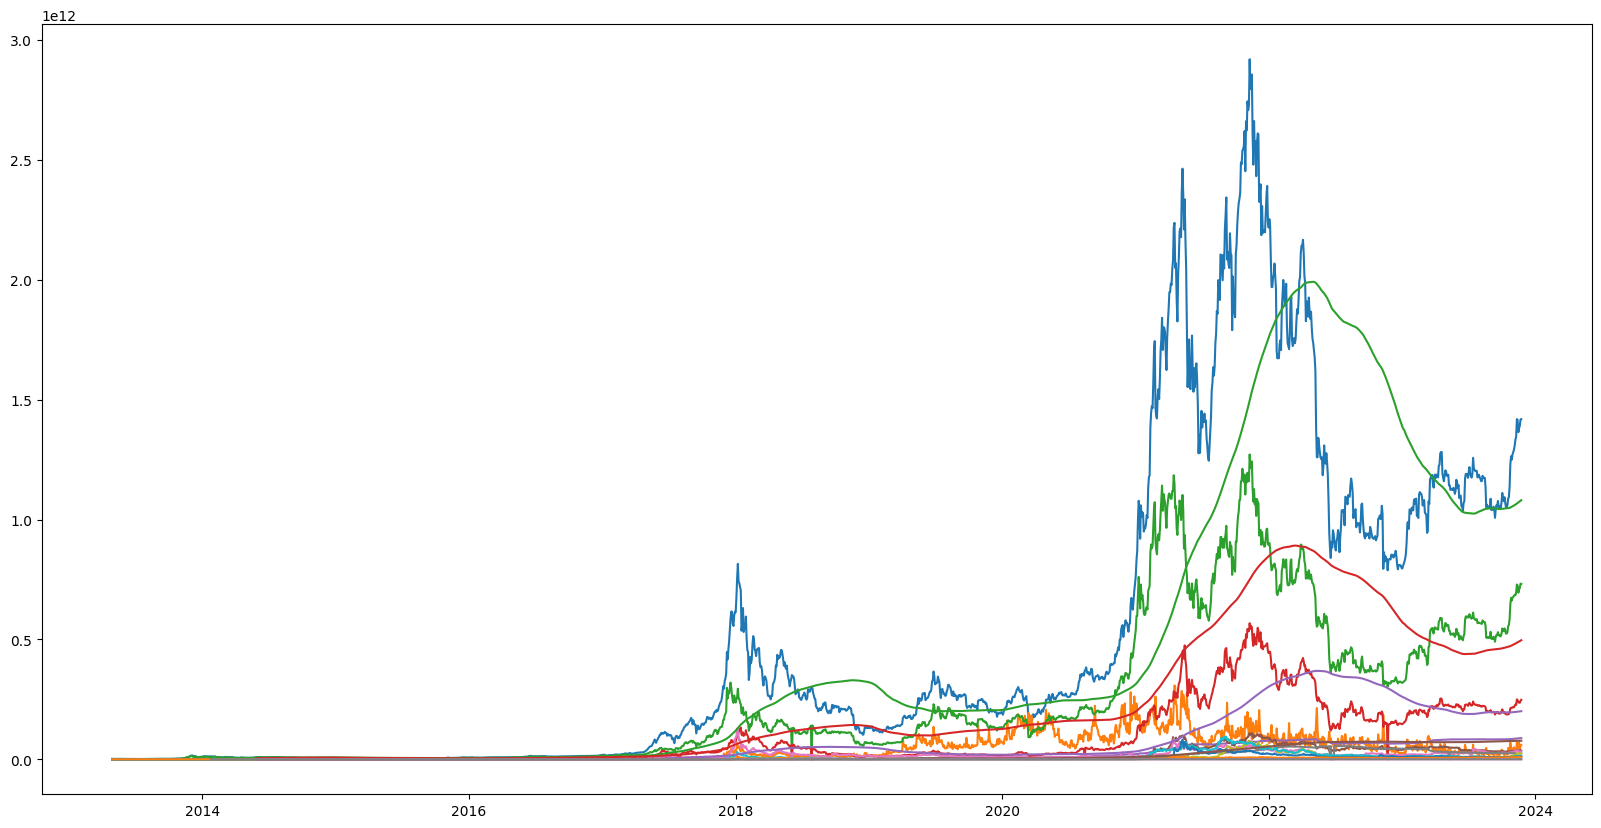

In [12]:
plt.figure(figsize=(20,10))
plt.plot(df_marketcap);

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
result = adfuller(df_marketcap['Market cap'])
result[1]

0.6014104311867816

## Probamos métodos de interpolación

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/interpolate/_fitpack2.py:313: UserWarning: 
A theoretically impossible result was found during the iteration
process for finding a smoothing spline with fp = s: s too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/interpolate/_fitpack2.py:313: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


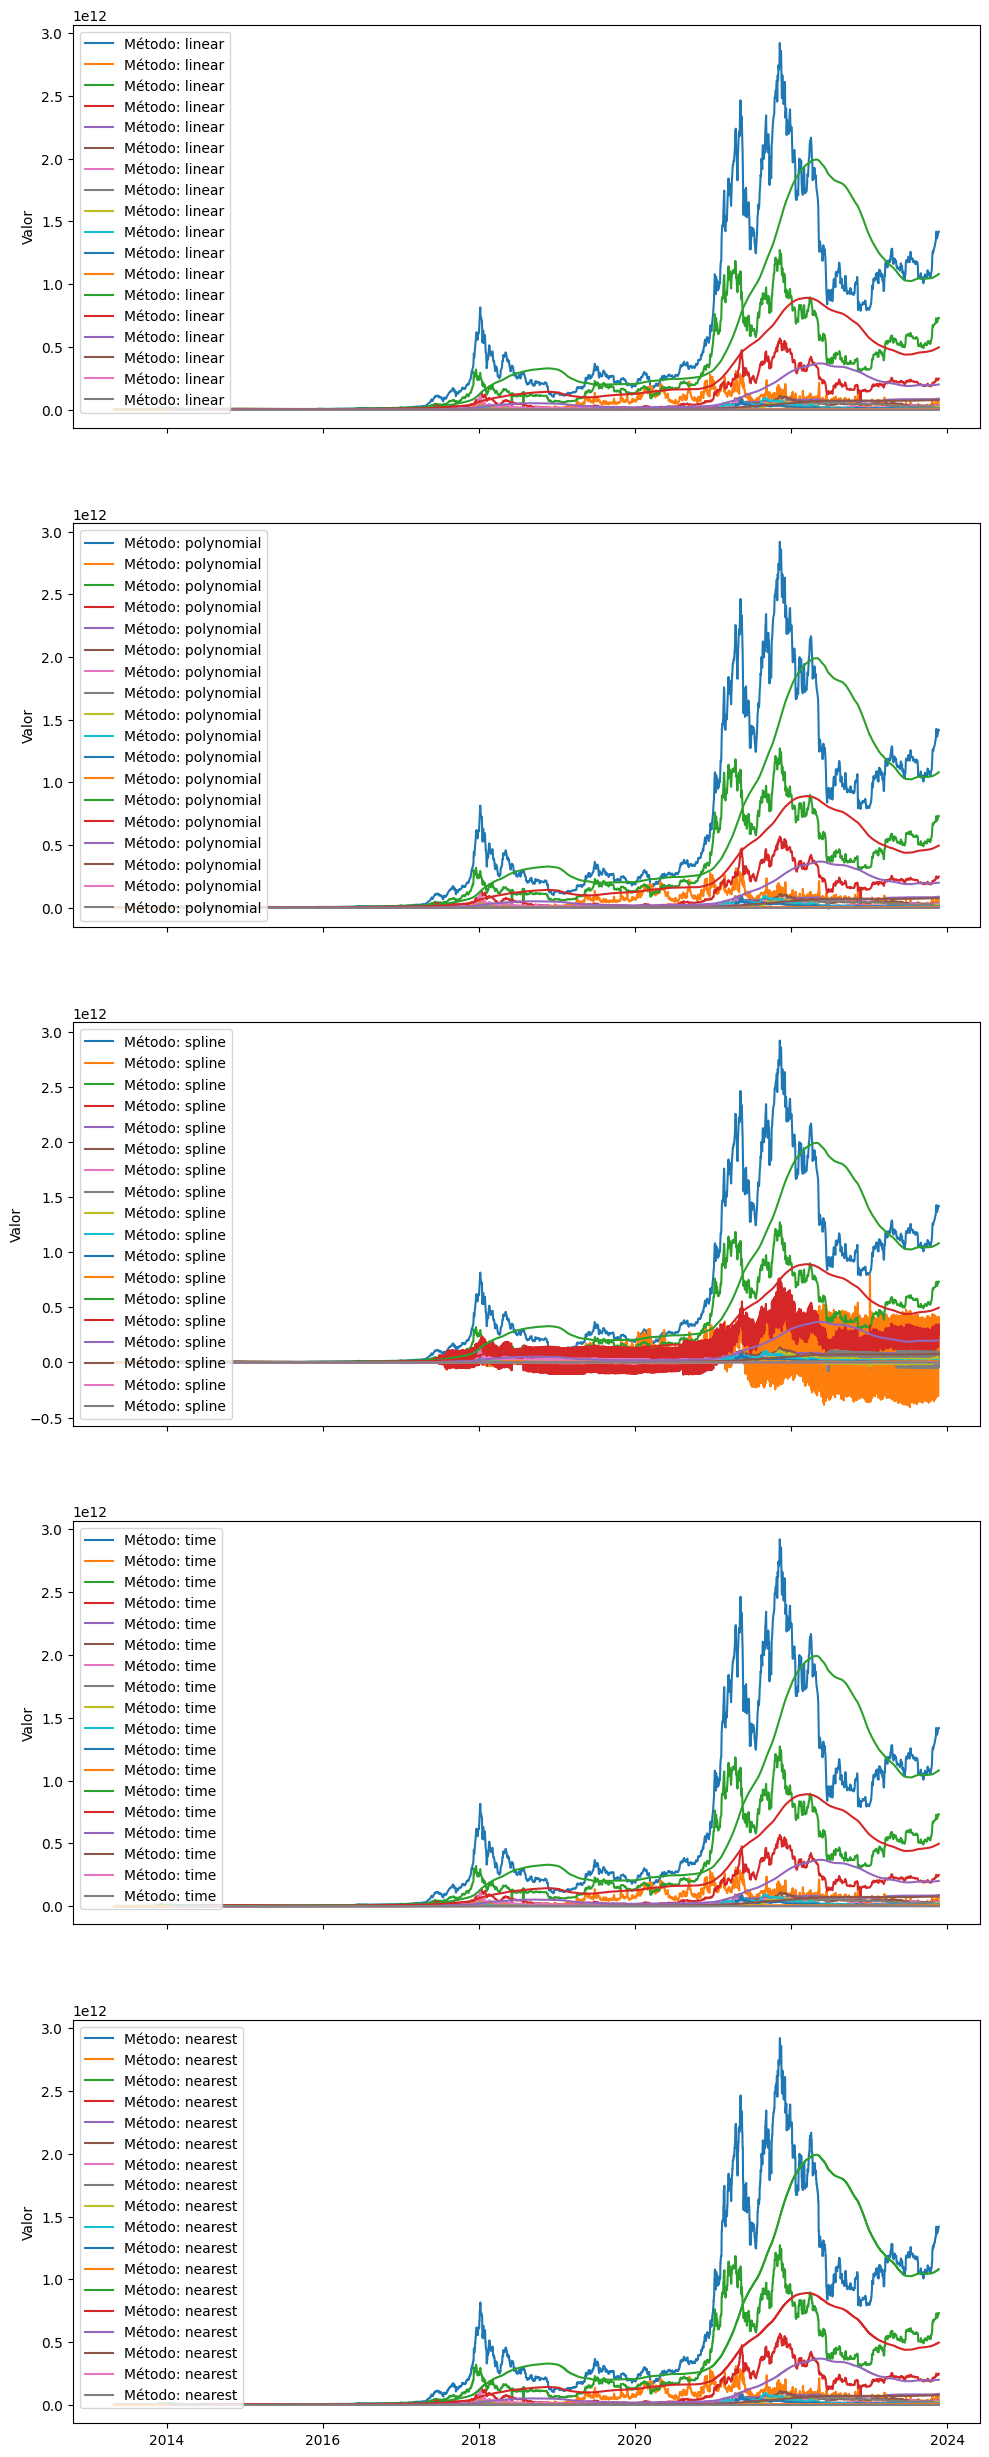

In [15]:
def interpolate_methods(df_agrupado):
    
    metodos = ['linear', 'polynomial', 'spline', 'time', 'nearest']

    fig, axs = plt.subplots(len(metodos), 1, figsize=(10, 5 * len(metodos)), sharex=True)

    for i, metodo in enumerate(metodos):
        if metodo in ['polynomial', 'spline']:
            df_interpolado = df_agrupado.interpolate(method=metodo, order=2) 
        else:
            df_interpolado = df_agrupado.interpolate(method=metodo)

        axs[i].plot(df_agrupado.index, df_interpolado, label=f'Método: {metodo}')
        axs[i].legend()
        axs[i].set_ylabel('Valor')

    plt.tight_layout()
    plt.show()

interpolate_methods(df_agrupado)

In [16]:
df_agrupado = df_agrupado.interpolate(method='time')
df_agrupado

,Market cap,Volume (24h),Market cap BTC,Market cap ETH,Market cap USDT,Market cap BNB,Market cap XRP,Market cap USDC,Market cap SOL,Market cap ADA,Market cap DOGE,Market cap TRX,MA200,MA200/BTC,MA200/ETH,MA200/USDT,MM,NVT-smooth
DateTime,,,,,,,,,,,,,,,,,,
2013-04-29,1.583440e+09,0.000000e+00,1.491167e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,1.610415e+09,0.000000e+00,1.516992e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-01,1.637390e+09,0.000000e+00,1.542817e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-02,1.456400e+09,0.000000e+00,1.361443e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-03,1.275410e+09,0.000000e+00,1.180068e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-19,1.390730e+12,4.060731e+10,7.151086e+11,2.360777e+11,8.773070e+10,3.716176e+10,3.283192e+10,2.441563e+10,2.474817e+10,1.332426e+10,1.140690e+10,9.129964e+09,1.075721e+12,4.928296e+11,1.997223e+11,7.717872e+10,1.451026,29.983021
2023-11-20,1.404145e+12,4.781834e+10,7.237818e+11,2.396275e+11,8.774615e+10,3.781981e+10,3.287615e+10,2.446574e+10,2.433211e+10,1.337908e+10,1.122944e+10,9.045281e+09,1.076966e+12,4.937408e+11,1.999320e+11,7.722705e+10,1.465887,30.272333
2023-11-21,1.417561e+12,5.502937e+10,7.324551e+11,2.431773e+11,8.776159e+10,3.847786e+10,3.292038e+10,2.451585e+10,2.391605e+10,1.343389e+10,1.105198e+10,8.960598e+09,1.078212e+12,4.946520e+11,2.001417e+11,7.727539e+10,1.480748,30.561645


In [17]:
df_agrupado = df_agrupado.fillna(0)

In [18]:
df_agrupado.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3861 entries, 2013-04-29 to 2023-11-23
Freq: D
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Market cap       3861 non-null   float64
 1   Volume (24h)     3861 non-null   float64
 2   Market cap BTC   3861 non-null   float64
 3   Market cap ETH   3861 non-null   float64
 4   Market cap USDT  3861 non-null   float64
 5   Market cap BNB   3861 non-null   float64
 6   Market cap XRP   3861 non-null   float64
 7   Market cap USDC  3861 non-null   float64
 8   Market cap SOL   3861 non-null   float64
 9   Market cap ADA   3861 non-null   float64
 10  Market cap DOGE  3861 non-null   float64
 11  Market cap TRX   3861 non-null   float64
 12  MA200            3861 non-null   float64
 13  MA200/BTC        3861 non-null   float64
 14  MA200/ETH        3861 non-null   float64
 15  MA200/USDT       3861 non-null   float64
 16  MM               3861 non-null   f

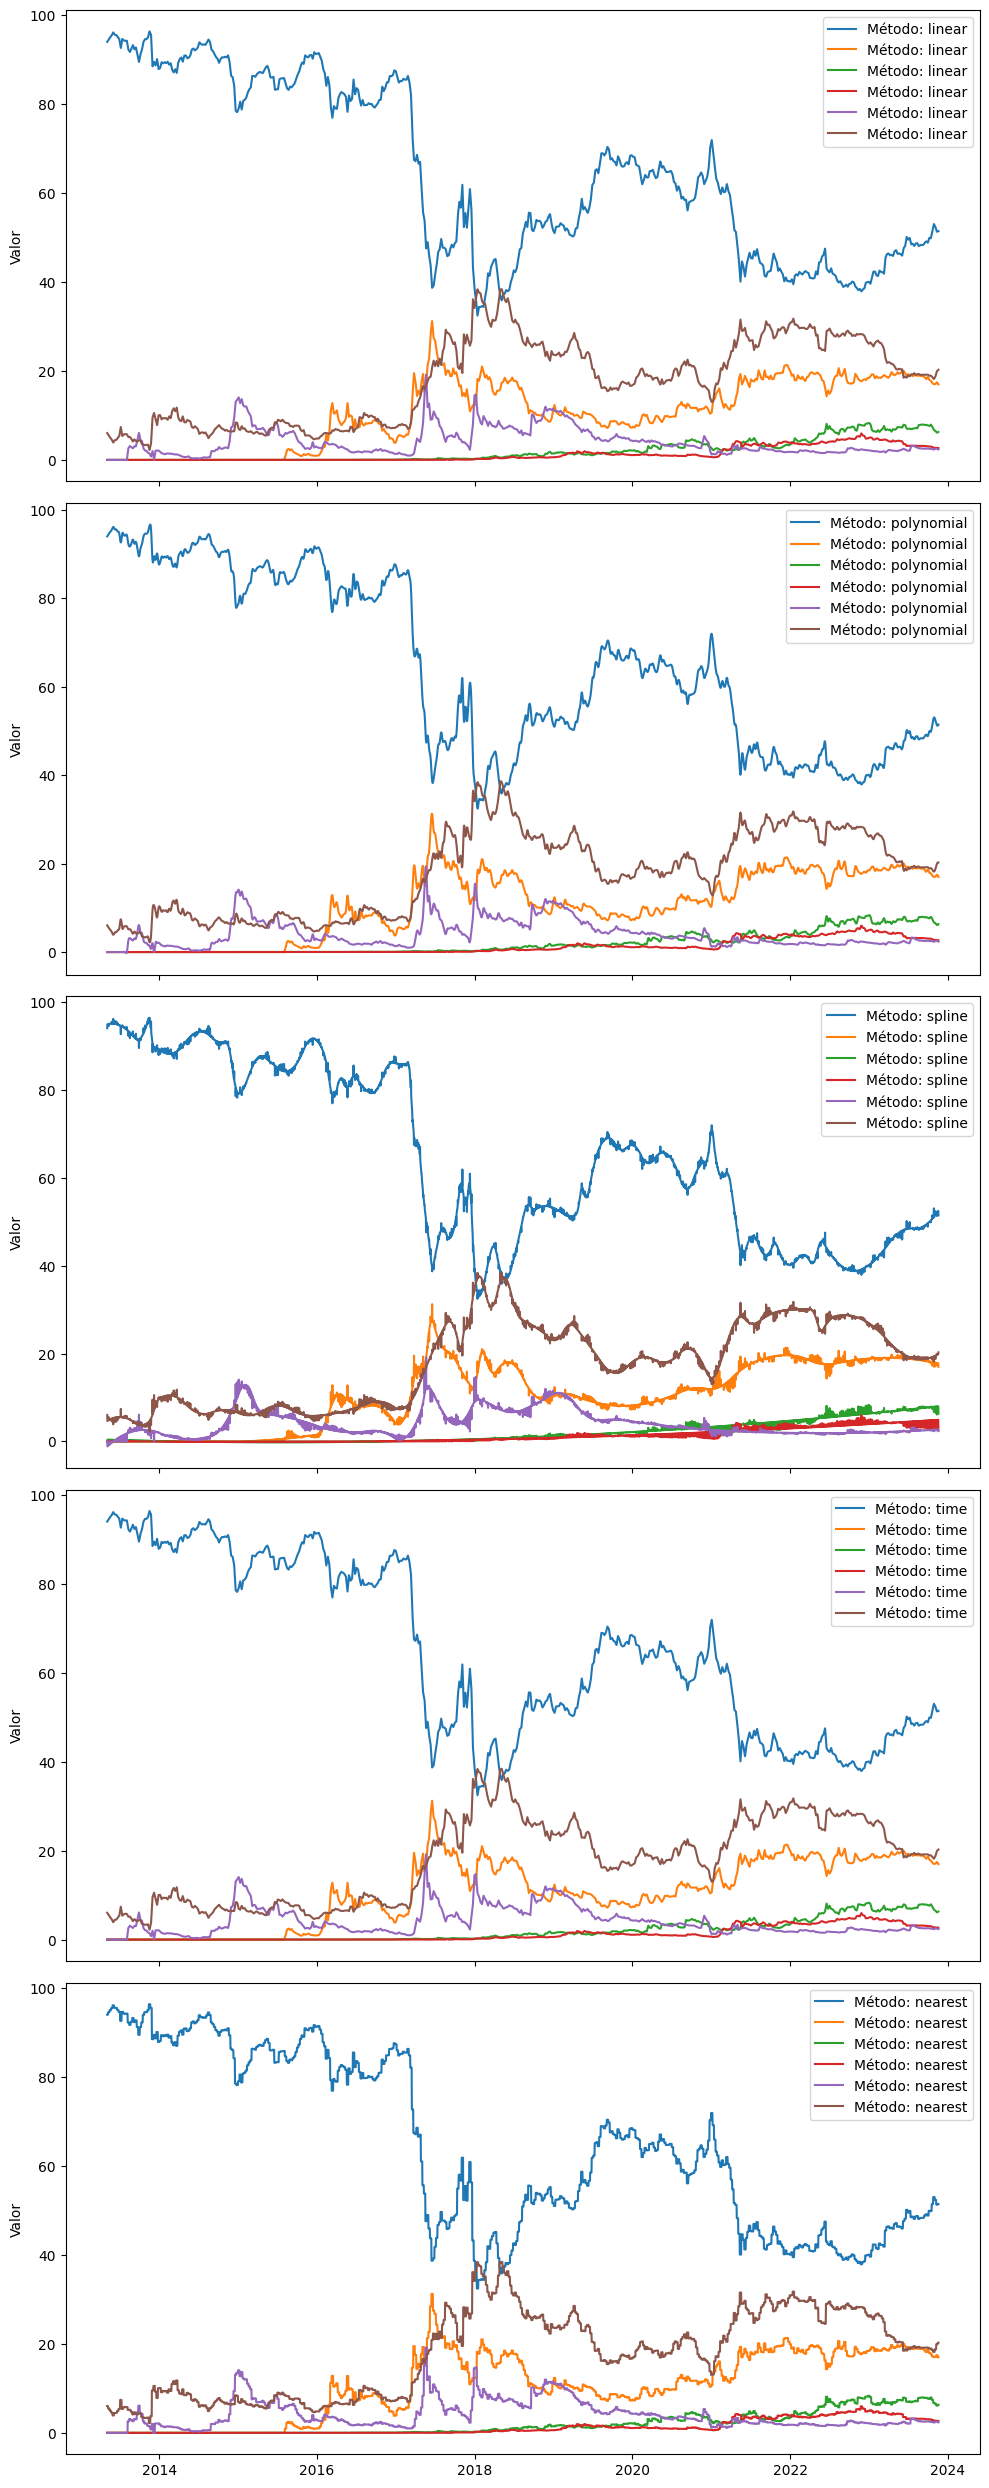

In [22]:
def interpolate_methods(df_domper100):
    
    metodos = ['linear', 'polynomial', 'spline', 'time', 'nearest']

    fig, axs = plt.subplots(len(metodos), 1, figsize=(10, 5 * len(metodos)), sharex=True)

    for i, metodo in enumerate(metodos):
        if metodo in ['polynomial', 'spline']:
            df_interpolado = df_domper100.interpolate(method=metodo, order=2) 
        else:
            df_interpolado = df_domper100.interpolate(method=metodo)

        axs[i].plot(df_domper100.index, df_interpolado, label=f'Método: {metodo}')
        axs[i].legend()
        axs[i].set_ylabel('Valor')

    plt.tight_layout()
    plt.show()

interpolate_methods(df_domper100)

In [23]:
df_domper100 = df_domper100.interpolate(method='time')
df_domper100

,BTC,ETH,USDT,BNB,XRP,Otros
DateTime,,,,,,
2013-05-05,93.962930,0.000000,0.000000,0.000000,0.000000,6.037070
2013-05-06,94.040459,0.000000,0.000000,0.000000,0.000000,5.959541
2013-05-07,94.117987,0.000000,0.000000,0.000000,0.000000,5.882013
2013-05-08,94.195515,0.000000,0.000000,0.000000,0.000000,5.804485
2013-05-09,94.273043,0.000000,0.000000,0.000000,0.000000,5.726957
...,...,...,...,...,...,...
2023-11-15,51.341703,17.247180,6.203849,2.685689,2.447865,20.073714
2023-11-16,51.361190,17.179158,6.229948,2.682293,2.426091,20.121319
2023-11-17,51.380677,17.111137,6.256048,2.678897,2.404317,20.168924


In [24]:
df_agrupado

,Market cap,Volume (24h),Market cap BTC,Market cap ETH,Market cap USDT,Market cap BNB,Market cap XRP,Market cap USDC,Market cap SOL,Market cap ADA,Market cap DOGE,Market cap TRX,MA200,MA200/BTC,MA200/ETH,MA200/USDT,MM,NVT-smooth
DateTime,,,,,,,,,,,,,,,,,,
2013-04-29,1.583440e+09,0.000000e+00,1.491167e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
2013-04-30,1.610415e+09,0.000000e+00,1.516992e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
2013-05-01,1.637390e+09,0.000000e+00,1.542817e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
2013-05-02,1.456400e+09,0.000000e+00,1.361443e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
2013-05-03,1.275410e+09,0.000000e+00,1.180068e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-19,1.390730e+12,4.060731e+10,7.151086e+11,2.360777e+11,8.773070e+10,3.716176e+10,3.283192e+10,2.441563e+10,2.474817e+10,1.332426e+10,1.140690e+10,9.129964e+09,1.075721e+12,4.928296e+11,1.997223e+11,7.717872e+10,1.451026,29.983021
2023-11-20,1.404145e+12,4.781834e+10,7.237818e+11,2.396275e+11,8.774615e+10,3.781981e+10,3.287615e+10,2.446574e+10,2.433211e+10,1.337908e+10,1.122944e+10,9.045281e+09,1.076966e+12,4.937408e+11,1.999320e+11,7.722705e+10,1.465887,30.272333
2023-11-21,1.417561e+12,5.502937e+10,7.324551e+11,2.431773e+11,8.776159e+10,3.847786e+10,3.292038e+10,2.451585e+10,2.391605e+10,1.343389e+10,1.105198e+10,8.960598e+09,1.078212e+12,4.946520e+11,2.001417e+11,7.727539e+10,1.480748,30.561645


In [25]:
monedas = ['BTC', 'ETH', 'USDT', 'BNB', 'XRP', 'USDC', 'SOL', 'ADA', 'DOGE', 'TRX']

for moneda in monedas:
    col_market_cap = f'Market cap {moneda}'
    col_porcentaje = f'Porcentaje {moneda}'
    df_agrupado[col_porcentaje] = (df_agrupado[col_market_cap] / df_agrupado['Market cap'])

In [26]:
df_def = df_agrupado

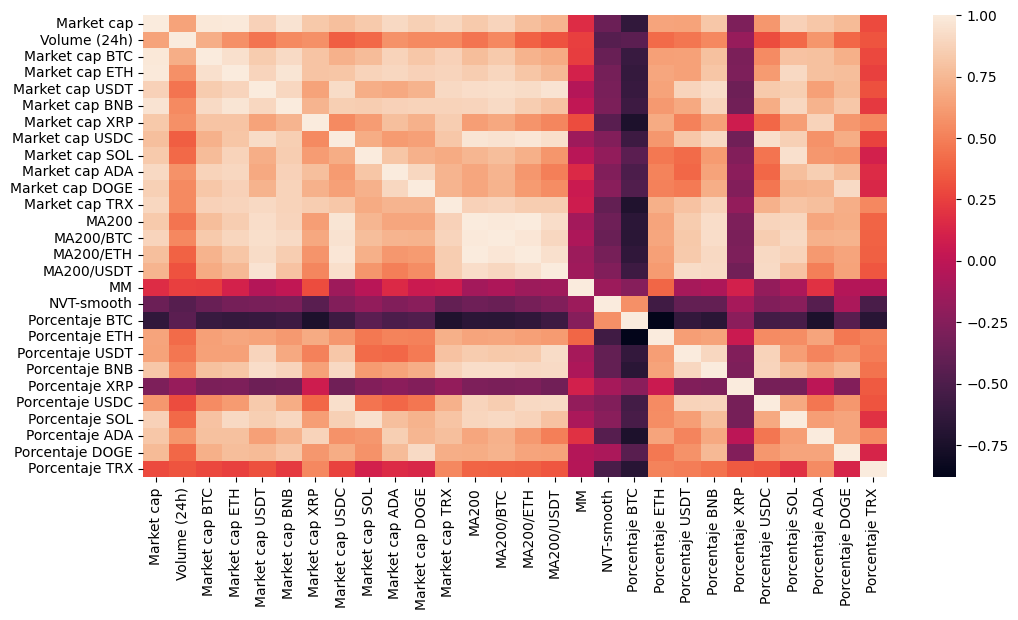

In [27]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_def.corr());

In [28]:
df_def = df_def.drop(columns=["MM","NVT-smooth"])

In [29]:
df_def['Porcentaje Otros'] = 1 - df_def.iloc[:,-10:].sum(axis=1)

In [30]:
df_def.columns

Index(['Market cap', 'Volume (24h)', 'Market cap BTC', 'Market cap ETH',
       'Market cap USDT', 'Market cap BNB', 'Market cap XRP',
       'Market cap USDC', 'Market cap SOL', 'Market cap ADA',
       'Market cap DOGE', 'Market cap TRX', 'MA200', 'MA200/BTC', 'MA200/ETH',
       'MA200/USDT', 'Porcentaje BTC', 'Porcentaje ETH', 'Porcentaje USDT',
       'Porcentaje BNB', 'Porcentaje XRP', 'Porcentaje USDC', 'Porcentaje SOL',
       'Porcentaje ADA', 'Porcentaje DOGE', 'Porcentaje TRX',
       'Porcentaje Otros'],
      dtype='object')

In [31]:
cap_top10 = df_def[["Market cap BTC","Market cap ETH","Market cap USDT","Market cap BNB","Market cap XRP","Market cap USDC","Market cap SOL","Market cap ADA","Market cap DOGE","Market cap TRX"]].sum(axis=1)

In [32]:
df_def['Market cap Others'] = df_def['Market cap'] - cap_top10

In [33]:
df_def.insert(12, 'Market cap Others', df_def.pop('Market cap Others'))

In [34]:
df_def.columns

Index(['Market cap', 'Volume (24h)', 'Market cap BTC', 'Market cap ETH',
       'Market cap USDT', 'Market cap BNB', 'Market cap XRP',
       'Market cap USDC', 'Market cap SOL', 'Market cap ADA',
       'Market cap DOGE', 'Market cap TRX', 'Market cap Others', 'MA200',
       'MA200/BTC', 'MA200/ETH', 'MA200/USDT', 'Porcentaje BTC',
       'Porcentaje ETH', 'Porcentaje USDT', 'Porcentaje BNB', 'Porcentaje XRP',
       'Porcentaje USDC', 'Porcentaje SOL', 'Porcentaje ADA',
       'Porcentaje DOGE', 'Porcentaje TRX', 'Porcentaje Otros'],
      dtype='object')